In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
pumpkins = pd.read_csv("us_pumpkins.csv")
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head


<bound method NDFrame.head of       City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1739  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1740  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1741  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1742  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   

         Date  Low Price  High Price  Mostly Low  ...  Un

In [7]:
pumpkins.isnull().sum()


City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [8]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]


In [9]:
price = pumpkins['High Price'] + pumpkins['Low Price'] / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

In [10]:
new_pumpkins = pd.DataFrame({'Month':month, 'Package':pumpkins['Package'], 'Low Price':pumpkins['Low Price'], 'High Price':pumpkins['High Price'], 'Price':price})
print(new_pumpkins)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  22.500
71        9  1 1/9 bushel cartons      18.00        18.0  27.000
72       10  1 1/9 bushel cartons      18.00        18.0  27.000
73       10  1 1/9 bushel cartons      17.00        17.0  25.500
74       10  1 1/9 bushel cartons      15.00        15.0  22.500
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  22.500
1739      9    1/2 bushel cartons      13.75        15.0  21.875
1740      9    1/2 bushel cartons      10.75        15.0  20.375
1741      9    1/2 bushel cartons      12.00        12.0  18.000
1742      9    1/2 bushel cartons      12.00        12.0  18.000

[415 rows x 5 columns]


In [11]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

<function matplotlib.pyplot.show(close=None, block=None)>

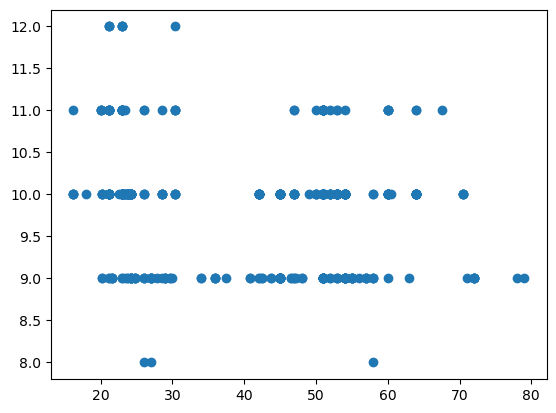

In [12]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show

Text(0, 0.5, 'Pumpkin Price')

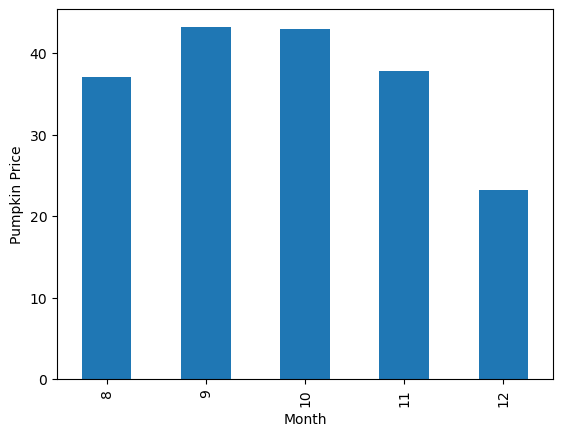

In [13]:
new_pumpkins.groupby(['Month']) ['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")